# Spline interpolacion
  

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$.

agregando el punto (2,5)

In [ ]:
x0, x1, x2 , x3 = -1, 0, 1 , 2
_x = np.array([x0, x1, x2 ,x3])
y0, y1, y2 , y3 =  5, 3, 3 ,5
_y = np.array([y0, y1, y2 , y3])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_1$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])

In [ ]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [ ]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

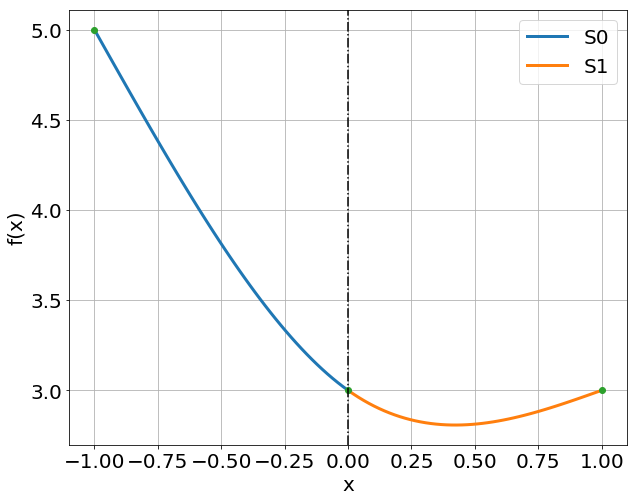

In [ ]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

{a0: 5, a0_0: 3, a1: -5/2, a1_1: -1, a2: 0, a2_2: 3/2, a3: 1/2, a3_3: -1/2}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{a0: 3, a0_0: 3, a1: -1/2, a1_1: 1, a2: 0, a2_2: 3/2, a3: 1/2, a3_3: -1/2}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{a0: 3, a0_0: 5, a1: 7/2, a1_1: -1, a2: 0, a2_2: -9/2, a3: -3/2, a3_3: 3/2}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{a0: 5, a0_0: 1, a1: -13/2, a1_1: 1, a2: 0, a2_2: 15/2, a3: 5/2, a3_3: -5/2}


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

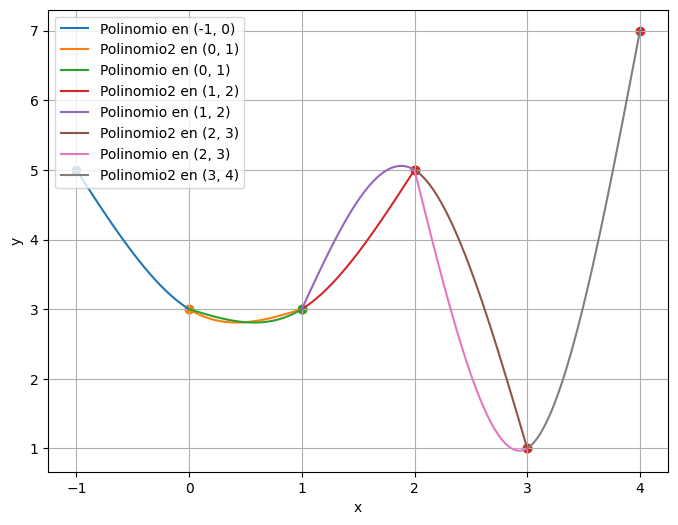

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

#Nombrar como variables simbólicas los coeficientes de los polinomios
#*********************
x = sp.Symbol('x')
a0 = sp.Symbol('a0')
a1 = sp.Symbol('a1')
a2 = sp.Symbol('a2')
a3 = sp.Symbol('a3')

a0_0 = sp.Symbol('a0_0')
a1_1 = sp.Symbol('a1_1')
a2_2 = sp.Symbol('a2_2')
a3_3 = sp.Symbol('a3_3')
#*************************



#Puntos sobre los cuales se quiere interpolar
puntos = np.array(  [   [-1,5],[0,3],[1,3],[2,5],[3,1],[4,7]     ]    )

plt.figure(figsize=(8, 6))


#El siguiente ciclo ira tomando de a dos pares de puntos (x0,y0),(x1,y1)
for i in range(0,len(puntos)-2):

    #***********************************************************************************************************************
    #polinomio = a0 + a1( x - x0 ) + a2( x - x0)**2 + a3( x - x0 )**3
    #polinomio2 = a0_0 + a1_1( x - x1 ) + a2_2( x - x1 )**2 + a3_3( x - x1 )**3

    polinomio = a0 + a1 * ( x - puntos[i][0] ) + a2 * ( x - puntos[i][0] )**2 + a3 * ( x - puntos[i][0] )**3
    polinomio2 = a0_0 + a1_1 * ( x - puntos[i+1][0] ) + a2_2 * ( x - puntos[i+1][0] )**2 + a3_3 * ( x - puntos[i+1][0] )**3

    #derivadas de cada uno de los polinomios
    derivada1_p = sp.diff( polinomio , x )
    derivada2_p = sp.diff( derivada1_p , x )
    derivada1_p2 = sp.diff( polinomio2 , x )
    derivada2_p2 = sp.diff( derivada1_p2 , x )

    #*************************************************************************************************************************

    #******************************************************************************************************
    #codiciones de continuidad

    # derivada1_p(x1)= derivada1_p2(x1)
    condicion_derivada_1 = derivada1_p.subs( x , puntos[i+1][0] ) - derivada1_p2.subs( x , puntos[i+1][0] )

    #derivada2_p(x1)= derivada2_p(x1)
    condicion_derivada_2 = derivada2_p.subs( x , puntos[i+1][0] )- derivada2_p2.subs( x , puntos[i+1][0] )

    #polinomio(x1)= y1
    #polinomio2(x1)= y1
    condicion_p =  polinomio.subs( x , puntos[i+1][0] ) - puntos[i+1][1]
    condicion_p2 =polinomio2.subs( x , puntos[i+1][0] ) - puntos[i+1][1]

    #********************************************************************************************************


    #**************************************************************************************************************
    #Condiciones adicionales

    # derivada2_p(x0) = 0(condición de maximo , minimo o inflexion en un extremo para polinomio)
    condicion_derivada_2pA = derivada2_p.subs( x , puntos[i][0])

    # derivada2_p2(x2) = 0(condición de maximo , minimo o inflexion  en un extremo para polinomio2 -notese que se evalua en x2)
    condicion_derivada_2p2A = derivada2_p2.subs( x , puntos[i+2][0])

    #polinomio(x0) = y0
    condicion_pA =  polinomio.subs( x , puntos[i][0] ) - puntos[i][1]

    #plinomio2(x2) = y2
    condicion_p2A =polinomio2.subs( x , puntos[i+2][0] ) - puntos[i+2][1]

    #****************************************************************************************************************



    #*********************************************************************
    # Convertir a formato LaTeX
    polinomio_latex = sp.latex( polinomio )
    derivada1_p_latex = sp.latex( derivada1_p )
    derivada2_p_latex = sp.latex( derivada2_p )
    polinomio2_latex = sp.latex( polinomio2 )
    derivada1_p2_latex = sp.latex( derivada1_p2 )
    derivada2_p2_latex = sp.latex( derivada2_p2)

    condicion_derivada_1_latex = sp.latex( condicion_derivada_1 )
    condicion_derivada_2_latex = sp.latex( condicion_derivada_2 )
    condicion_p_latex = sp.latex( condicion_p )
    condicion_p2_latex = sp.latex( condicion_p2 )
    condicion_pA_latex = sp.latex( condicion_pA )
    condicion_p2A_latex = sp.latex( condicion_p2A )
    condicion_derivada_2pA_latex =sp.latex( condicion_derivada_2pA )
    condicion_derivada_2p2A_latex =sp.latex(  condicion_derivada_2p2A )

    #********************************************************************


    #***************************************************************************
    #solucionando las ecuaciones para hallar los coeficientes
    sol = sp.solve(( condicion_derivada_1 ,condicion_derivada_2, condicion_p,
                    condicion_p2,condicion_derivada_2pA,condicion_derivada_2p2A,
                     condicion_pA, condicion_p2A,
                      )
    , (a0, a1,a2,a3,a0_0, a1_1,a2_2,a3_3))
    print(sol)

    #***************************************************************************


    #*********************************************************************************************
    #Mostrar el resultado en formato LaTeX
    display(Math('P: {}'.format(polinomio_latex)))
    display(Math('P° : {}'.format(derivada1_p_latex)))
    display(Math('P°° : {}'.format(derivada2_p_latex)))
    display(Math('P2: {}'.format(polinomio2_latex)))
    display(Math('P2°: {}'.format(derivada1_p2_latex)))
    display(Math('P2°°: {}'.format(derivada2_p2_latex)))

    display(Math('Condición:: P°(x1) = P2°(x1) -> {}'.format(condicion_derivada_1_latex)))
    display(Math('Condición:: P°°(x1) = P2°°(x1) -> {}'.format(condicion_derivada_2_latex)))
    display(Math('Condició:: (Px1) = y1 ->{}'.format(condicion_p_latex)))
    display(Math('Condición::P2(x1) = y1 -> {}'.format(condicion_p2_latex)))
    display(Math('Condición-adicional:: P°°(x0) = 0 ->{}'.format( condicion_derivada_2pA_latex)))
    display(Math('Condición-adicional:: p°°(x2) = 0 -> {}'.format(condicion_derivada_2p2A_latex)))
    display(Math('Condición-adicional:: P(x0) = y0 -> {}'.format( condicion_pA_latex)))
    display(Math('Condición-adicional::P(x2) = y2 -> {}'.format(condicion_p2A_latex)))

    #**********************************************************************************************



    # Crear expresiones simbólicas para los polinomios completos
    polinomio_completo = polinomio.subs(sol)
    polinomio2_completo = polinomio2.subs(sol)


    # Crear funciones evaluadas en un rango de valores de x
    x_valores1 = np.linspace(puntos[i][0], puntos[i+1][0], 100)  # Intervalo para polinomio
    x_valores2 = np.linspace(puntos[i+1][0],puntos[i+2][0], 100)   # Intervalo para polinomio2



    polinomio_evaluado = np.array([polinomio_completo.evalf(subs={x: val}) for val in x_valores1])
    polinomio2_evaluado = np.array([polinomio2_completo.evalf(subs={x: val}) for val in x_valores2])


    # Grafica los polinomios en el mismo gráfico

    etiqueta_polinomio = f'Polinomio en ({puntos[i][0]}, {puntos[i+1][0]})'
    etiqueta_polinomio2 = f'Polinomio2 en ({puntos[i+1][0]}, {puntos[i+2][0]})'



    plt.plot(x_valores1,polinomio_evaluado, label= etiqueta_polinomio)
    plt.plot(x_valores2, polinomio2_evaluado, label= etiqueta_polinomio2)
    plt.scatter(   [  puntos[i][0] , puntos[i+1][0]  , puntos[i+2][0] ] , [ puntos[i][1] , puntos[i+1][1]   , puntos[i+2][1]   ])

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()




